<a href="https://colab.research.google.com/github/DorianD6/NBHV-G4360-Intro-Theory-2021/blob/main/Assignment_4_3_1_Dongrui_Deng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 3: Two Types of Ring Networks: Bump Attractors or an SSN
### 3-1: Bump Attractor

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def Bump_Attractor(W_0, W_1, h_0, h_1, r_0):
  r = np.zeros([180,1000]); '''Change the duration to similate for a longer time'''
  r[:, 0] = r_0
  h = np.zeros([180])
  W = np.zeros([180, 180])
  tau = 0.01 # Set tau=10[msec]
  dt = 0.1*tau # Set dt=0.1*tau=1[msec]
  theta_h = 0; '''Change this line to try different values for theta_h.'''
  v_th = 1 * np.ones([180]) # Set v_th=1.0
  for j in range(180):
    h[j] = h_0 + 2*h_1*np.cos((j/180)*2*np.pi-theta_h)
    for k in range(180):
      W[j, k] = W_0 + 2*W_1*np.cos(((j-k)/180)*2*np.pi)
      W[j, k] = W[j, k] / 180
  for i in range(1000-1): #Change here along with the 2nd line
    # Calculate dr/dt
    x = W @ r[:, i] + h - v_th
    drdt = (1 / tau) * (-r[:, i] + np.maximum(x, 0))
    # Update V with Euler Method
    r[:, i+1] = r[:, i] + drdt * dt
  return r

#### a. Consider a Uniform Input, $h_1 = 0$
First, plot the case for $h_0 < v_{th}$.

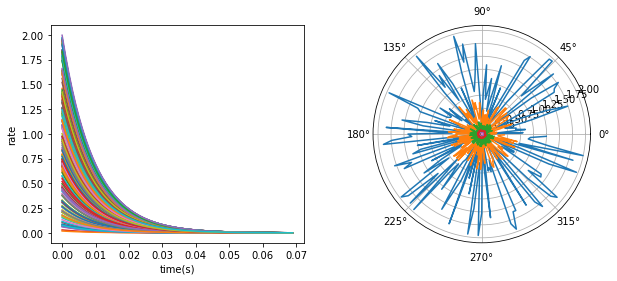

In [ ]:
# Set up W, h and r_0
W_0 = 0.3 # 0 < W_0 < 1
W_1 = 1.5 # 1 < W_1 < 2 with W_0 + W_1 < 2
h_0 = 0.5
h_1 = 0
r_0 = 2 * np.random.rand(180) # a random initial condition with positive activations
# Plot the time courses and the polar projection plot of rates 
t = np.arange(0,0.07,0.001)
theta = np.arange(0, 2*np.pi, 2*np.pi/180)
r = Bump_Attractor(W_0, W_1, h_0, h_1, r_0)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
for i in range(180):
  ax.plot(t, r[i, :70])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax = fig.add_subplot(122, projection = 'polar')
for j in range(7):
  ax.plot(theta, r[:, 10*j])
ax.plot(theta, r[:, -1])
plt.show()

It is verified that for $h_0 < v_{th}$, dynamics decay to ${\bf r = 0}$, even when starting with a random initial condition of positive activations.

Next, plot the case for $h_0 = v_{th} + 1$.

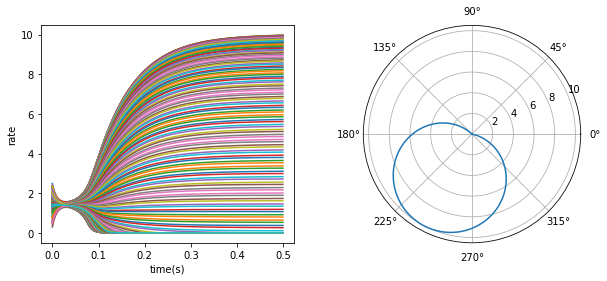

In [ ]:
# Set up W, h and r_0: W_0, W_1, h_1 do not change
h_0 = 1.0 + 1.0
r_0 = 1.5 + 0.5*np.random.randn(180) # an initial condition with noise
# Plot the time courses and the polar projection plot of rates 
t = np.arange(0,0.5,0.001)
theta = np.arange(0, 2*np.pi, 2*np.pi/180)
r = Bump_Attractor(W_0, W_1, h_0, h_1, r_0)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
for i in range(180):
  ax.plot(t, r[i, :500])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax = fig.add_subplot(122, projection = 'polar')
ax.plot(theta, r[:, -1]) # Terminal Activity
plt.show()

We can observe that curves for the bump attractor look like a bottleneck here.

Furthermore, plot the case for $h_0 = v_{th} + 10$.

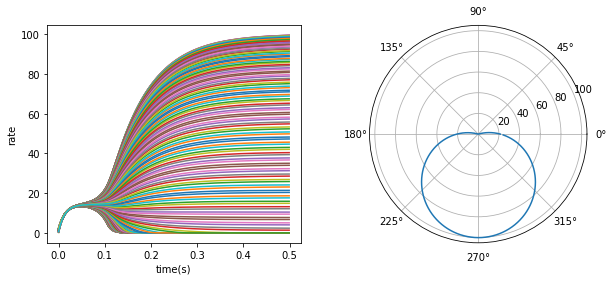

In [ ]:
# Set up W, h and r_0
h_0 = 1.0 + 10
r_0 = 1.5 + 0.5*np.random.randn(180)
# Plot the time courses and the polar projection plot of rates 
t = np.arange(0,0.5,0.001) # Simulate for 20s: Change the function code!
theta = np.arange(0, 2*np.pi, 2*np.pi/180)
r = Bump_Attractor(W_0, W_1, h_0, h_1, r_0)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
for i in range(180):
  ax.plot(t, r[i, :500])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax = fig.add_subplot(122, projection = 'polar')
ax.plot(theta, r[:, -1]) # Terminal Activity
plt.show()

It is verified that the dynamics evolve to a bump solution as long as the initial condition has any nonzero (positive) noise, no matter how small.

The system evolves bump solutions with different heights (amplitudes of the rates) and similar shapes depending on the selection of $h_0$. \
With an increasing $h_0$, the bump height **grows** (actually the height is almost linear to $h_0$) while the shape still looks similar. \
However, it takes more time for the bump to happen if we increase $h_0$, and therefore we need to simulate for a longer time in this case. \

#### b. The Zero Bump Activity at Specific Direction
To begin with, find out the analytical solution for the angle at which the activity reach 0.

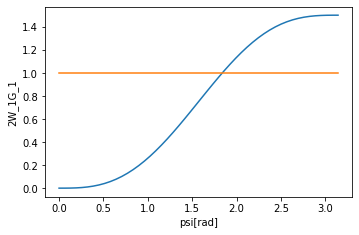

The angle at which the activity should reach zero:
1.8593099378388571 rad =  106.53061224489795 deg


In [ ]:
psi = np.linspace(0, np.pi)
G_1 = 1/(2*np.pi)*(psi - np.sin(2*psi)/2)
plt.figure(figsize=(5.5,3.5))
plt.plot(psi, 2*W_1*G_1)
plt.plot(psi, np.ones_like(psi))
plt.xlabel('psi[rad]')
plt.ylabel('2W_1G_1')
plt.show()
ang = psi[np.argmin(np.abs(2*W_1*G_1 - 1))]
print('The angle at which the activity should reach zero:')
print(ang, 'rad = ', ang*180/np.pi, 'deg')

Then, plot the time courses at the angle we obtained above away from the bump center. 

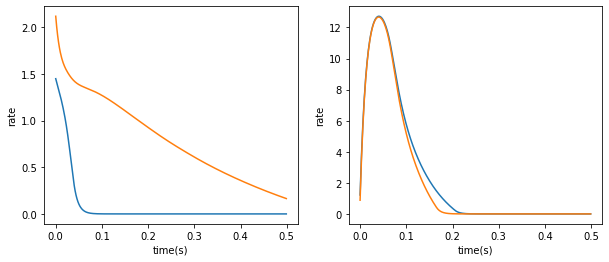

In [ ]:
t = np.arange(0,0.5,0.001)
deg = ang*180/np.pi
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
# We should let h_1>0, otherwise we would observe a random bump location.
r = Bump_Attractor(W_0=0.3, W_1=1.5, h_0=2.0, h_1=0.1, r_0 = 1.5 + 0.5*np.random.randn(180))
ax.plot(t, r[int(deg/2), :500])
ax.plot(t, r[int(180-deg/2), :500])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax = fig.add_subplot(122)
r = Bump_Attractor(W_0=0.3, W_1=1.5, h_0=11.0, h_1=0.1, r_0 = 1.5 + 0.5*np.random.randn(180))
ax.plot(t, r[int(deg/2), :500])
ax.plot(t, r[int(180-deg/2), :500])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
plt.show()

The simulation result seems to agree with the analytical solution.

#### c. Add a weak tuned input $h_1$: $h_1 = 0.1(h_0 - v_{th})$

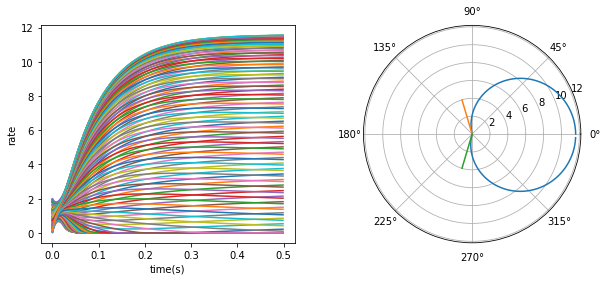

In [ ]:
# Set up W, h and r_0 (W_0, W_1, r_0 stay the same here)
h_0 = 1.0 + 1.0 # Choose h_0 = 2.0
h_1 = 0.1 * 1.0 # h_0-v_th=1.0
# Plot the time courses and the polar projection plot of rates
t = np.arange(0,0.5,0.001)
theta = np.arange(0, 2*np.pi, 2*np.pi/180) 
r = Bump_Attractor(W_0, W_1, h_0, h_1, r_0)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
for i in range(180):
  ax.plot(t, r[i, :500])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax = fig.add_subplot(122, projection = 'polar')
ax.plot(theta, r[:, -1])
ax.plot(ang*np.ones(400), np.arange(0,4,0.01))
ax.plot((2*np.pi-ang)*np.ones(400), np.arange(0,4,0.01))
plt.show()

Adding a weak tuned input causes the bump location to get close to or equal to $\theta_h$.
The bump appear to be similar otherwise.


#### d. Simulate with the same parameters except $0 < W_1 < 1$
First, plot the case for the uniform input i.e. $h_1 = 0$.

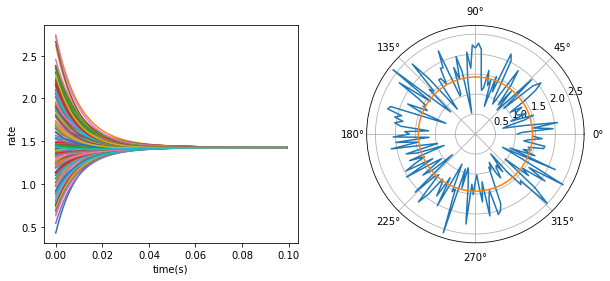

In [ ]:
t = np.arange(0,0.1,0.001)
r = Bump_Attractor(W_0=0.3, W_1=0.5, h_0=2.0, h_1=0, r_0= 1.5 + 0.5*np.random.randn(180)) # Choose W_1=0.5 < 1
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
for i in range(180):
  ax.plot(t, r[i, :100])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax = fig.add_subplot(122, projection = 'polar')
ax.plot(theta, r[:, 1])
ax.plot(theta, r[:, -1])
plt.show()

We can observe that the uniform solution is stable, and there is no bump solution to a uniform input.

Next, plot the case for the non-uniform input (nonzero $h_1$).

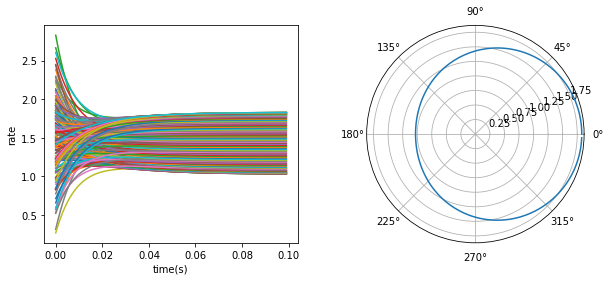

In [ ]:
t = np.arange(0,0.1,0.001)
theta = np.arange(0, 2*np.pi, 2*np.pi/180)
r = Bump_Attractor(W_0=0.3, W_1=0.5, h_0=2.0, h_1=0.1, r_0=1.5+0.5*np.random.randn(180))
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
for i in range(180):
  ax.plot(t, r[i, :100])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax = fig.add_subplot(122, projection = 'polar')
ax.plot(theta, r[:, -1])
plt.show()

The steady state arrived here for a non-uniform input (nonzero $h_1$) tells us it is somewhat between the stable solution and the bump solution for $W_1$ > 1. (i.e. the bump effect is less prominent (less obvious) than the case for $W_1$ > 1 and the curves are not going to diverge quickly.)


#### Additional (Optional) Question 1: Add time-varying noise to the simulation for the case with $h_1=0$

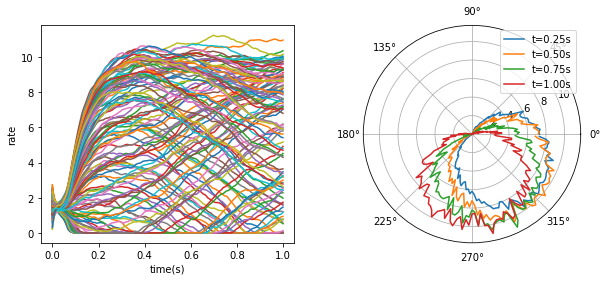

In [ ]:
# Set up W, h and r_0
W_0 = 0.3
W_1 = 1.5
h_0 = 2.0
r_0 = 1.5 + 0.5*np.random.randn(180)
# Bump Attractor
r = np.zeros([180,1000]) 
r[:, 0] = r_0
h = np.zeros([180])
W = np.zeros([180, 180])
tau = 0.01 # Set tau=10[msec]
dt = 0.1*tau # Set dt=0.1*tau=0.001[msec]
theta_h = 0; '''Change this line to try different values for theta_h.'''
v_th = 1 * np.ones([180]) # Set v_th=1.0
for j in range(180):
  h[j] = h_0
  for k in range(180):
    W[j, k] = W_0 + 2*W_1*np.cos(((j-k)/180)*2*np.pi)
    W[j, k] = W[j, k] / 180
for i in range(1000-1):
  # Add i.i.d noise to h_i at each time step
  h = h + 0.02*np.random.randn(180)
  # Calculate dr/dt
  x = W @ r[:, i] + h - v_th
  drdt = (1 / tau) * (-r[:, i] + np.maximum(x, 0))
  # Update V with Euler Method
  r[:, i+1] = r[:, i] + drdt * dt
# Plot the time courses and the polar projection plot of rates 
t = np.arange(0,1,0.001)
theta = np.arange(0, 2*np.pi, 2*np.pi/180)
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)
for i in range(180):
  ax.plot(t, r[i, :])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax = fig.add_subplot(122, projection = 'polar')
ax.plot(theta, r[:, 250], label = 't=0.25s')
ax.plot(theta, r[:, 500], label = 't=0.50s')
ax.plot(theta, r[:, 750], label = 't=0.75s')
ax.plot(theta, r[:, -1], label = 't=1.00s')
ax.legend()
plt.show()

I found that the steady-state bump drifted in location, roughly as a ranfom walk meaning that \
the distance that the bump travels over some time will grow as the squareroot of the time.

#### Additional (Optional) Question 2: Add time-varying noise to the simulation for the case with $h_1>0$

In [ ]:
def Bump_Attractor(W_0, W_1, h_0, h_1, r_0, theta_h):
  r = np.zeros([180,1500])
  r[:, 0] = r_0
  h = np.zeros([180])
  W = np.zeros([180, 180])
  tau = 0.01 # Set tau=10[msec]
  dt = 0.1*tau # Set dt=0.1*tau=0.001[msec]
  v_th = 1 * np.ones([180]) # Set v_th=1.0
  for j in range(180):
    for k in range(180):
      W[j, k] = W_0 + 2*W_1*np.cos(((j-k)/180)*2*np.pi)
      W[j, k] = W[j, k] / 180
  for i in range(1500-1): #Change here along with the 2nd line
    for j in range(180):
      h[j] = h_0 + 2*h_1*np.cos((j/180)*2*np.pi-theta_h[int(i/500)])
    # Calculate dr/dt
    x = W @ r[:, i] + h - v_th
    drdt = (1 / tau) * (-r[:, i] + np.maximum(x, 0))
    # Update V with Euler Method
    r[:, i+1] = r[:, i] + drdt * dt
  return r

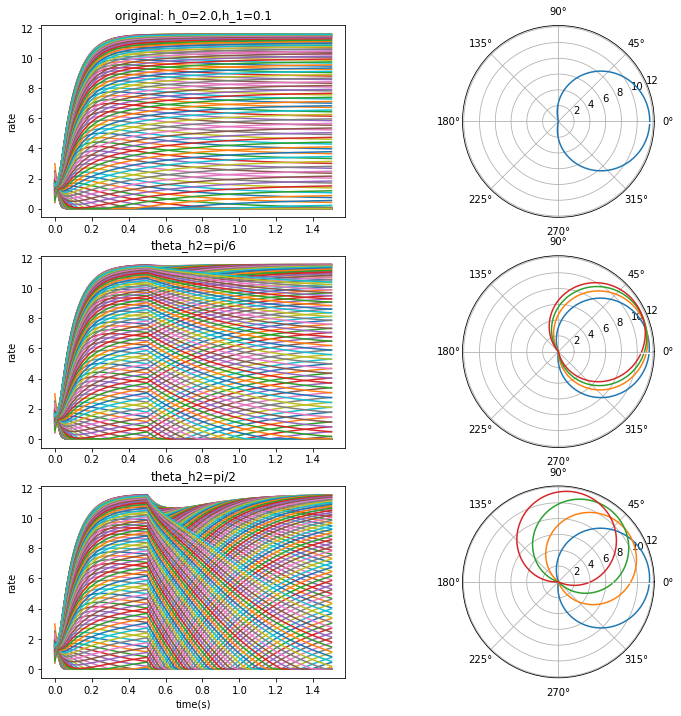

In [ ]:
# Set up W, h, r_0 and theta_h
W_0 = 0.3
W_1 = 1.5
h_0 = 1.0 + 1.0 # Choose h_0 = 2.0
h_1 = 0.1 * 1.0 # h_0-v_th=1.0
r_0 = 1.5 + 0.5*np.random.randn(180)
theta_h_1 = [0,0,0]
theta_h_2 = [0,1/6*np.pi,1/6*np.pi]
theta_h_3 = [0,1/2*np.pi,1/2*np.pi]
# Plot the time courses and the polar projection plot of rates 
t = np.arange(0,1.5,0.001) # Simulate for 100s
r_1 = Bump_Attractor(W_0, W_1, h_0, h_1, r_0, theta_h_1)
r_2 = Bump_Attractor(W_0, W_1, h_0, h_1, r_0, theta_h_2)
r_3 = Bump_Attractor(W_0, W_1, h_0, h_1, r_0, theta_h_3)
theta = np.arange(0, 2*np.pi, 2*np.pi/180)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(321)
for i in range(180):
  ax.plot(t, r_1[i, :])
ax.set_ylabel('rate')
ax.set_title('original: h_0=2.0,h_1=0.1')
ax = fig.add_subplot(322, projection = 'polar')
ax.plot(theta, r_1[:, -1])
ax = fig.add_subplot(323)
for i in range(180):
  ax.plot(t, r_2[i, :])
ax.set_ylabel('rate')
ax.set_title('theta_h2=pi/6')
ax = fig.add_subplot(324, projection = 'polar')
ax.plot(theta, r_2[:, 500])
ax.plot(theta, r_2[:, 750])
ax.plot(theta, r_2[:, 1000])
ax.plot(theta, r_2[:, -1])
ax = fig.add_subplot(325)
for i in range(180):
  ax.plot(t, r_3[i, :])
ax.set_xlabel('time(s)')
ax.set_ylabel('rate')
ax.set_title('theta_h2=pi/2')
ax = fig.add_subplot(326, projection = 'polar')
ax.plot(theta, r_3[:, 500])
ax.plot(theta, r_3[:, 750])
ax.plot(theta, r_3[:, 1000])
ax.plot(theta, r_3[:, -1])
plt.show()

The original bump begins to shrink immidiately after the change of input and the other begins to grow. The original bump will disappear finally and the new bump will grow to the size of the original bump at its first steady state.
It rotates from the original position towards the new center and it is, for sure, depending on the location of the 2nd bump relative to the original one (i.e. whether they are close to or far from each other). In general, it shrinks more quickly and rolates more (until reach the new bump location) if they are far from each other and vice versa. Plus, it takes relatively long time to change leaving the first steady state, which depends on the relative position of two bumps. If closer, then faster.

In summary, if the input is switched to a new location the activity bump could slowly rotate to the new location, in particular if old and new inputs are close to each other. Alternatively, a switch in the input could cause the bump to reappear at the new location.

Reference: https://neuronaldynamics.epfl.ch/online/Ch18.S3.html